In [1]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

In [2]:
digits=load_digits()
dir(digits)

['DESCR', 'data', 'images', 'target', 'target_names']

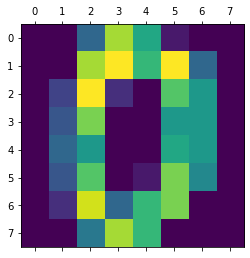

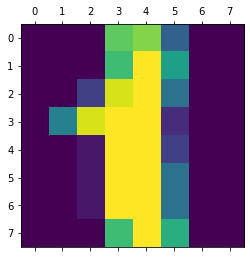

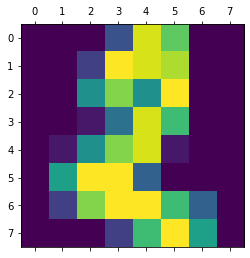

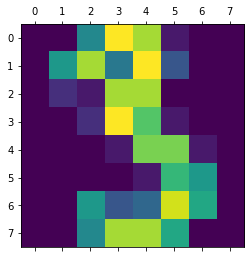

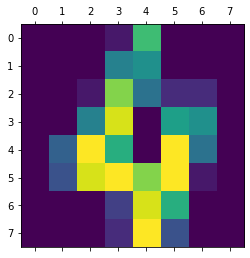

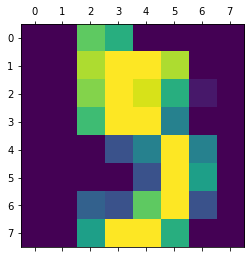

In [3]:
for i in range(6):
    plt.matshow(digits.images[i])

In [4]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [9]:
from sklearn.linear_model import LogisticRegression
reg=LogisticRegression()
reg

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [10]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(digits.data,digits.target,test_size=0.3)

In [13]:
reg.fit(xtrain,ytrain)

C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [15]:
reg.score(xtest,ytest)

0.95

In [16]:
reg.predict(digits.data[0:5])

array([0, 1, 2, 3, 4])

### Concept of Confusion Matrix

In [21]:
xtest

array([[ 0.,  4., 15., ...,  0.,  0.,  0.],
       [ 0.,  0.,  7., ...,  4.,  0.,  0.],
       [ 0.,  1., 12., ..., 14.,  1.,  0.],
       ...,
       [ 0.,  0.,  7., ...,  5.,  0.,  0.],
       [ 0.,  0., 13., ..., 16., 16., 11.],
       [ 0.,  0.,  0., ...,  5.,  0.,  0.]])

In [18]:
y_pred=reg.predict(xtest)
y_pred

array([5, 0, 3, 2, 6, 4, 2, 1, 8, 7, 4, 7, 0, 4, 3, 7, 0, 0, 8, 7, 2, 6,
       9, 4, 6, 1, 3, 1, 5, 3, 5, 9, 8, 3, 2, 8, 2, 7, 0, 6, 2, 0, 4, 8,
       0, 8, 3, 9, 8, 6, 5, 9, 3, 2, 7, 1, 0, 5, 3, 1, 5, 4, 9, 9, 6, 8,
       3, 0, 8, 6, 1, 5, 4, 4, 5, 3, 4, 9, 8, 6, 0, 8, 3, 6, 3, 3, 8, 2,
       3, 4, 3, 2, 0, 0, 6, 7, 3, 9, 4, 8, 6, 1, 8, 0, 8, 1, 9, 1, 8, 2,
       7, 9, 8, 2, 8, 9, 4, 7, 5, 8, 5, 5, 6, 5, 3, 0, 0, 6, 4, 7, 0, 4,
       7, 8, 8, 6, 7, 5, 2, 5, 3, 8, 4, 2, 5, 1, 6, 0, 6, 3, 5, 1, 2, 1,
       2, 5, 6, 3, 2, 1, 8, 7, 3, 4, 1, 4, 8, 4, 7, 4, 0, 6, 5, 0, 0, 9,
       3, 3, 9, 9, 2, 7, 4, 6, 0, 1, 7, 6, 0, 1, 5, 7, 4, 6, 3, 2, 2, 4,
       9, 9, 1, 9, 5, 9, 6, 2, 1, 9, 0, 1, 4, 0, 7, 5, 1, 3, 2, 8, 9, 7,
       7, 4, 0, 1, 6, 2, 4, 7, 3, 0, 0, 4, 0, 8, 7, 9, 8, 3, 7, 9, 2, 1,
       1, 6, 9, 9, 3, 7, 2, 6, 3, 5, 9, 8, 5, 3, 5, 1, 7, 0, 8, 5, 0, 7,
       4, 0, 2, 7, 8, 3, 6, 9, 5, 3, 0, 3, 3, 6, 8, 5, 2, 0, 1, 3, 9, 5,
       3, 9, 9, 2, 8, 6, 0, 1, 1, 7, 5, 6, 0, 2, 5,

In [19]:
from sklearn.metrics import confusion_matrix
cnf=confusion_matrix(ytest,y_pred)
cnf

array([[59,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 50,  0,  0,  0,  0,  0,  0,  1,  1],
       [ 0,  4, 45,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  2, 55,  0,  0,  0,  0,  3,  0],
       [ 0,  1,  0,  0, 44,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  1, 52,  0,  0,  1,  2],
       [ 0,  0,  0,  0,  0,  0, 52,  0,  0,  0],
       [ 0,  0,  0,  1,  1,  0,  0, 58,  0,  0],
       [ 0,  2,  1,  0,  0,  0,  0,  0, 51,  1],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  3, 47]], dtype=int64)

Text(33.0, 0.5, 'Truth')

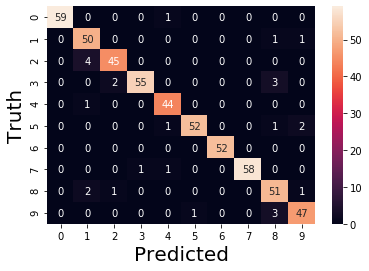

In [23]:
import seaborn as sn
plt.figure()
sn.heatmap(cnf, annot=True)
plt.xlabel('Predicted',fontsize=20)
plt.ylabel('Truth',fontsize=20)